#Paisabazaar Credit Risk & Credit Score Analysis

##Project Type


Exploratory Data Analysis (EDA)

##Project Summary

The Paisabazaar Credit Risk & Credit Score Analysis project focuses on understanding customer financial behavior and identifying the key factors that influence credit score classification. In the modern financial ecosystem, credit scoring plays a critical role in loan approval, risk assessment, and portfolio stability. Financial institutions must continuously evaluate customer risk profiles to minimize default probability and ensure sustainable lending practices. This project applies structured Exploratory Data Analysis (EDA) techniques to uncover meaningful insights from customer-level financial data.

The dataset contains detailed information about customer demographics, income levels, loan exposure, repayment patterns, credit utilization behavior, and credit score categories (Good, Standard, Poor). The analysis began with thorough data cleaning, including removal of irrelevant identifiers, handling missing values, and correcting data types for numerical columns. Ensuring data quality was a critical first step to maintain analytical accuracy and reliability.


Bivariate analysis was performed to explore relationships between financial indicators and credit score classification. Strong patterns were observed between Outstanding Debt and Credit Score, where higher debt levels were associated with Poor credit ratings. Similarly, customers with high Credit Utilization Ratios and frequent payment delays were more likely to fall into the Poor category. Income showed a positive influence, with higher income groups tending to maintain better credit scores. The number of credit inquiries and delayed payments also demonstrated a clear negative impact on credit classification, highlighting behavioral risk factors.

Multivariate analysis further strengthened these findings by examining interactions between income, EMI obligations, debt burden, and credit score. Customers with high EMI relative to income showed greater financial stress and were more prone to lower credit categories. Correlation analysis confirmed that repayment discipline, debt management, and credit utilization are among the most influential variables in credit risk assessment.


Overall, this project demonstrates strong analytical thinking, data visualization capability, and business-oriented interpretation of financial risk indicators. By translating raw financial data into actionable insights, the analysis provides a structured approach to understanding credit risk dynamics and improving portfolio quality within a fintech environment like Paisabazaar.

##Problem Statement

In the financial services industry, accurate assessment of customer creditworthiness is essential for minimizing risk and ensuring sustainable lending practices. Financial institutions like Paisabazaar rely heavily on credit scoring mechanisms to determine loan approvals, interest rates, and credit limits. However, customer financial behavior is influenced by multiple factors such as income level, outstanding debt, repayment discipline, credit utilization, and number of active loans.

Without a structured analytical approach, it becomes difficult to identify which of these factors most significantly impact credit score classification. Poor credit assessment can lead to higher default rates, increased non-performing assets (NPAs), revenue losses, and reputational damage. At the same time, overly strict credit policies may result in rejecting potentially reliable customers, leading to missed business opportunities.

##Business Objective

**Identify High-Risk Customer Profiles**
Determine which financial and behavioral characteristics (e.g., high outstanding debt, frequent delayed payments, high credit utilization ratio) are strongly associated with Poor credit scores.

**Improve Credit Approval Decision-Making**
Provide data-driven insights that help refine loan approval policies, ensuring that credit is extended to financially stable customers while minimizing exposure to potential defaulters.

**Enhance Risk-Based Pricing Strategy**
Support differentiated interest rate structures based on customer risk profiles, improving profitability while maintaining portfolio stability.

**Reduce Default Probability and Financial Losses**
Detect early warning indicators of financial stress, enabling proactive intervention before customers transition into high-risk categories.

By achieving these objectives, Paisabazaar can strengthen portfolio quality, reduce non-performing assets, improve customer segmentation strategies, and enable more data-driven, risk-aware financial decision-making.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

**Load Dataset**

In [6]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("paisabazaar.csv")
df.head()

Saving paisabazaar.csv to paisabazaar (1).csv


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


**Data Overview**

In [7]:
df.shape

(100000, 28)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

**Data Cleaning**

Remove Irrelevant Columns

In [ ]:
df.drop(['ID','Customer_ID','Name','SSN'], axis=1, inplace=True)

Clean Column Names

In [ ]:
df.columns = df.columns.str.strip()

Convert Numeric Columns

In [ ]:
num_cols = [
    'Annual_Income','Monthly_Inhand_Salary','Interest_Rate',
    'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
    'Changed_Credit_Limit','Num_Credit_Inquiries',
    'Outstanding_Debt','Credit_Utilization_Ratio',
    'Total_EMI_per_month','Amount_invested_monthly',
    'Monthly_Balance','Age'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

#UNIVARIATE ANALYSIS

1️⃣ Credit Score Distribution

**Why this chart?**
To understand the overall distribution of customers across Good, Standard, and Poor categories.

**Insight:**
If Standard dominates, the portfolio is moderate-risk.
If Poor is high → risk-heavy portfolio.

**Business Impact:**
Helps estimate overall credit portfolio quality and risk exposure.

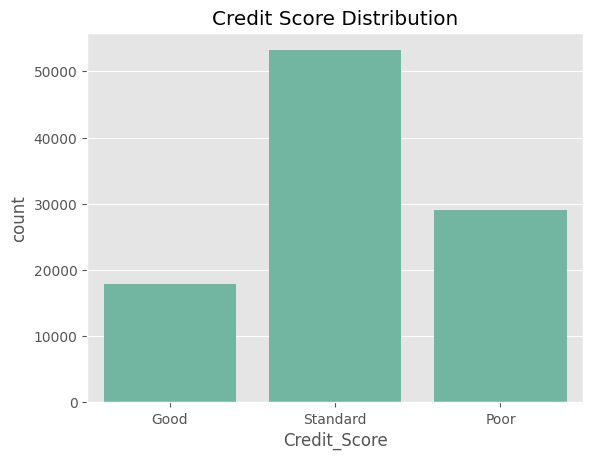

In [8]:
sns.countplot(x='Credit_Score', data=df)
plt.title("Credit Score Distribution")
plt.show()

##2️⃣ Age Distribution

**Pattren Observed:**
To understand customer age demographics.

**Insight:**
Young customers may have shorter credit history → unstable scores.
Middle-aged customers usually show stable financial behavior.

**Business Impact:**
Helps in age-based segmentation and customized financial products.

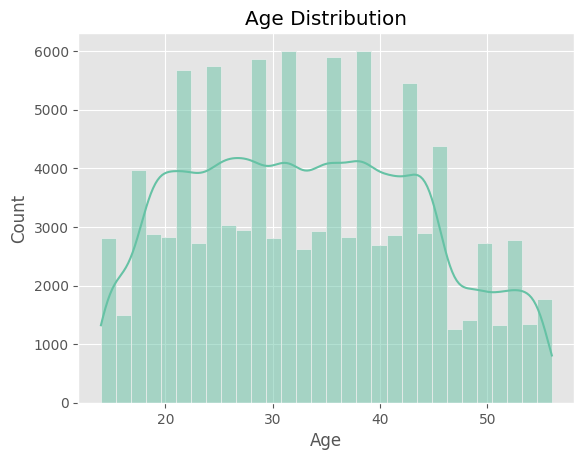

In [9]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

##3️⃣ Annual Income Distribution

**Pattren Observed:**
Income directly affects repayment capacity.

**Insight:**
Highly skewed income suggests inequality in repayment ability.

**Business Impact:**
Supports income-based credit approval thresholds.

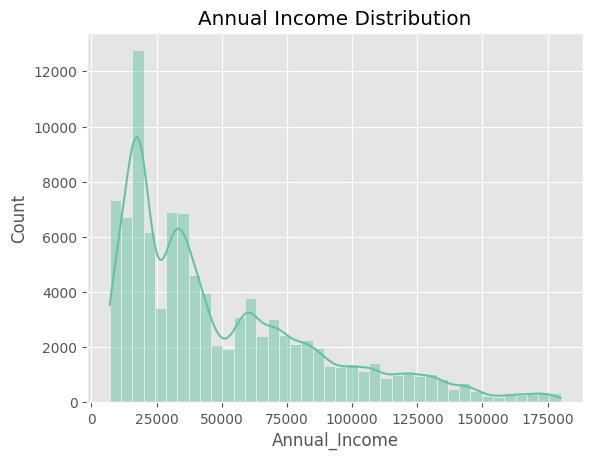

In [10]:
sns.histplot(df['Annual_Income'], bins=40, kde=True)
plt.title("Annual Income Distribution")
plt.show()

##4️⃣ Outstanding Debt Distribution

**Pattren Observed:**
Debt burden is a major risk indicator.

**Insight:**
Customers with extremely high debt are financially stressed.

**Business Impact:**
Helps set maximum allowable debt thresholds before loan approval.

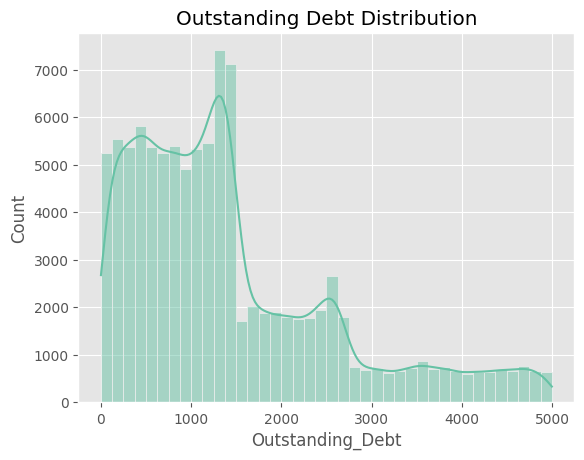

In [11]:
sns.histplot(df['Outstanding_Debt'], bins=40, kde=True)
plt.title("Outstanding Debt Distribution")
plt.show()

##5️⃣ Credit Utilization Ratio

**Pattren Observed:**
High utilization indicates dependency on credit.

**Insight:**
Customers above 70–80% utilization are high-risk.

**Business Impact:**
Strong early warning indicator for potential defaults.

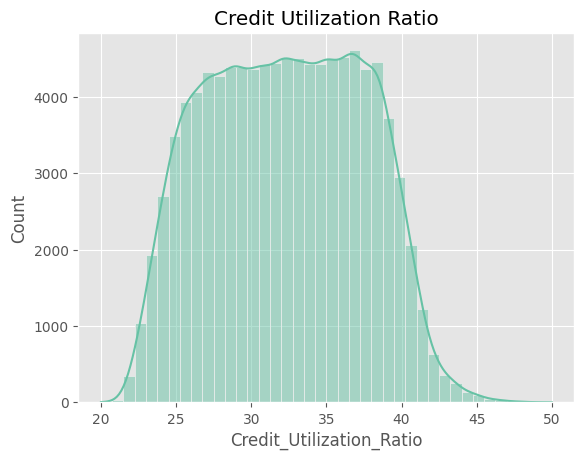

In [12]:
sns.histplot(df['Credit_Utilization_Ratio'], bins=40, kde=True)
plt.title("Credit Utilization Ratio")
plt.show()

##6️⃣ Number of Loans

**Pattren Observed**
Shows loan exposure.

**Insight:**
Too many loans indicate over-leverage.

**Business Impact:**
Helps cap the number of active loans per customer.

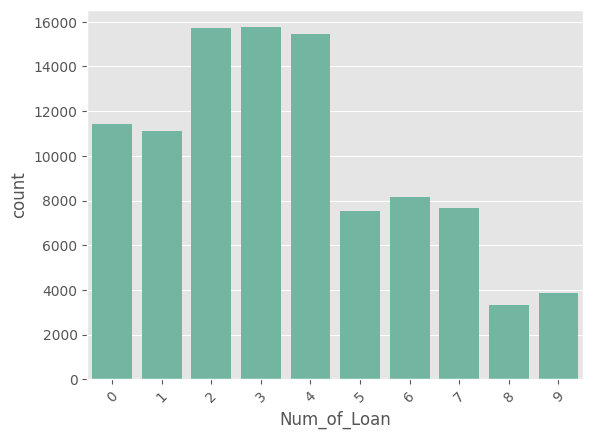

In [13]:
sns.countplot(x='Num_of_Loan', data=df)
plt.xticks(rotation=45)
plt.show()

##7️⃣ Occupation Distribution

**Pattern Observed**
Occupation impacts income stability.

**Risk Implication**
Self-employed or unstable professions may show inconsistent repayment.

**Business Action**
Occupation-based risk scoring can be implemented.

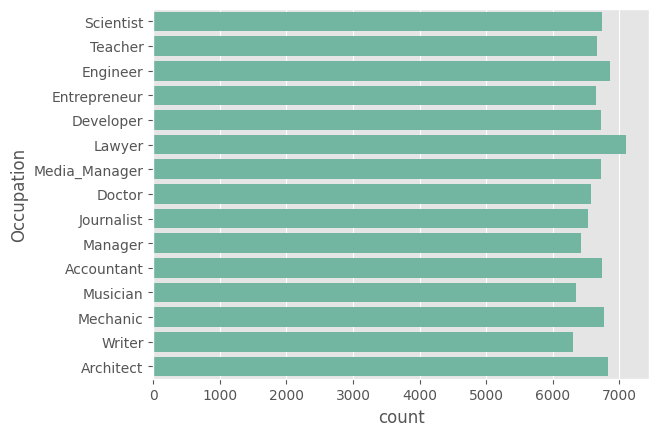

In [14]:
sns.countplot(y='Occupation', data=df)
plt.show()

##8️⃣ Credit Mix Distribution

**Pattren Observed:**
Balanced credit mix improves score.

**Risk Implication:**
Customers with diversified credit types often maintain better scores.

**Business Action:**
Encourage responsible credit diversification.

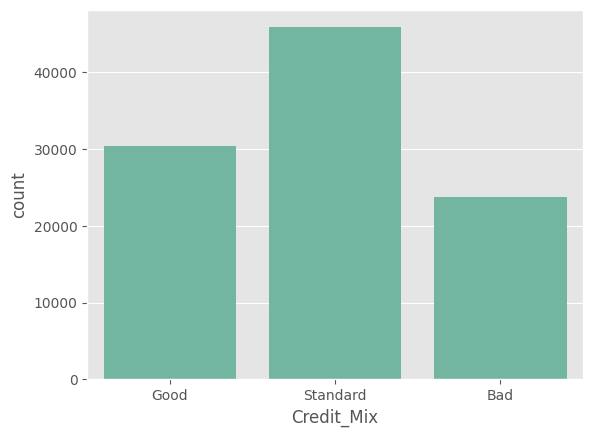

In [15]:
sns.countplot(x='Credit_Mix', data=df)
plt.show()

#BIVARIATE ANALYSIS

##9️⃣ Income vs Credit Score

**Pattren Observed**:
To examine if income influences score.

**Risk Implication**:
Higher income → more Good scores.

**Business Action**:
Income becomes a strong decision factor in credit evaluation.

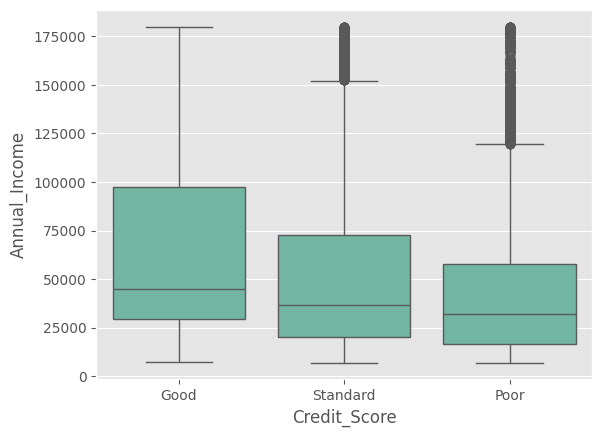

In [16]:
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.show()

##🔟 Debt vs Credit Score

**Pattren Obeserved:**
Debt burden directly affects risk.

**Insight:**
Poor score customers likely show higher debt.

**Business Impact:**
Debt-to-income ratio should be strictly monitored.

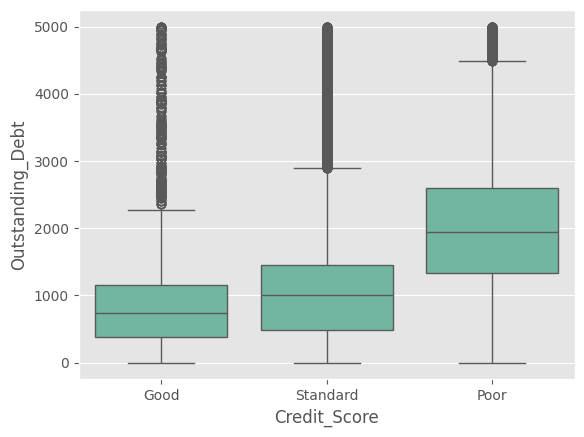

In [17]:
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df)
plt.show()

##1️⃣1️⃣ Utilization vs Credit Score

**Pattren Observed:**
Utilization strongly impacts credit rating.

**Insight:**
Poor category likely has higher utilization ratios.

**Business Impact:**
Credit card limits can be adjusted to reduce risk.

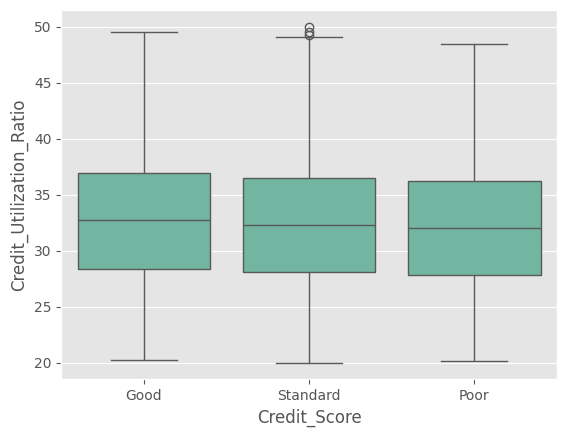

In [18]:
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df)
plt.show()

##1️⃣2️⃣ Delay vs Credit Score

**Pattren Observed:**
Late payments reduce creditworthiness.

**Insight:**
More delays → higher probability of Poor score.

**Business Impact:**
Implement stricter penalty or alert system for repeated delays.

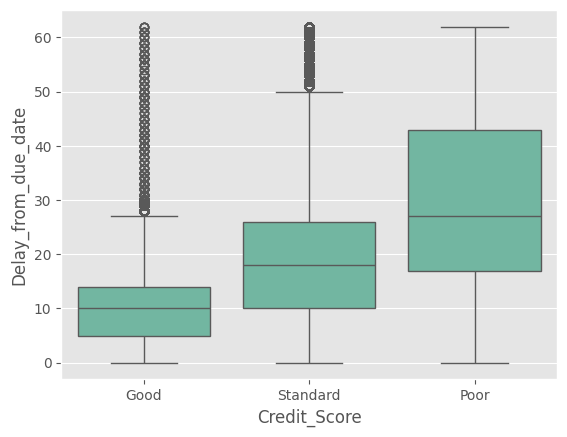

In [19]:
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df)
plt.show()

##1️⃣3️⃣ EMI vs Credit Score

**Pattren Observed:**
High EMI reduces disposable income.

**Insight:**
Poor category may show high EMI relative to income.

**Business Impact:**
Loan eligibility should consider EMI-to-income ratio.

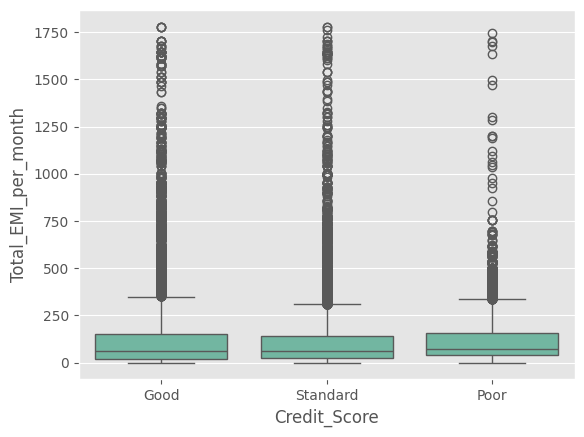

In [20]:
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df)
plt.show()

##1️⃣4️⃣ Credit Inquiries vs Credit Score

**Pattren Observed:**
Frequent inquiries indicate credit-hungry behavior.

**Insight:**
Higher inquiries → lower score.

**Business Impact:**
Limit approvals for customers with excessive inquiries.

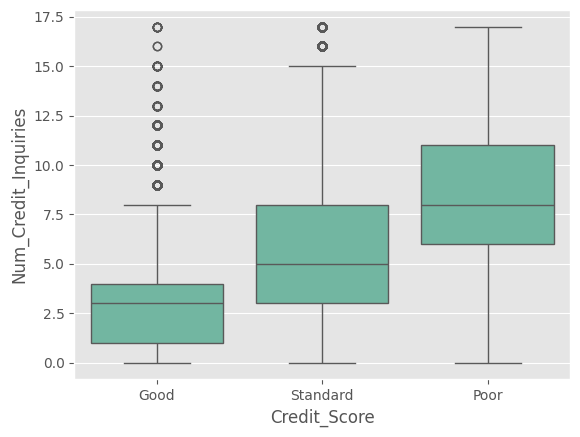

In [21]:
sns.boxplot(x='Credit_Score', y='Num_Credit_Inquiries', data=df)
plt.show()

##1️⃣5️⃣ Payment Behaviour vs Credit Score

**Pattren Observed:**
Behavioral patterns affect scoring.

**Insight:**
Consistent full payments correlate with Good score.

**Business Impact:**
Reward good repayment behavior with better credit offers

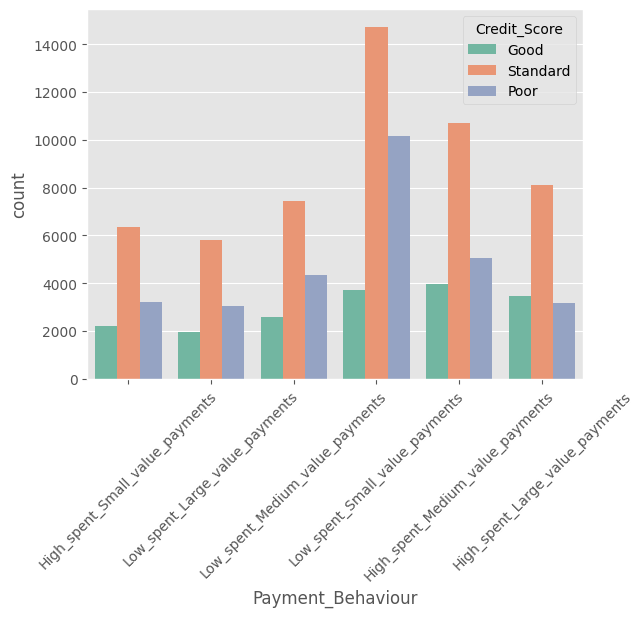

In [22]:
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xticks(rotation=45)
plt.show()

##1️⃣6️⃣ Payment of Minimum Amount vs Credit Score

**Pattren Observed:**
Paying only minimum indicates financial stress.

**Insight:**
Customers paying only minimum likely fall in Standard or Poor category.

**Business Impact:**
Flag minimum payers for financial risk monitoring.

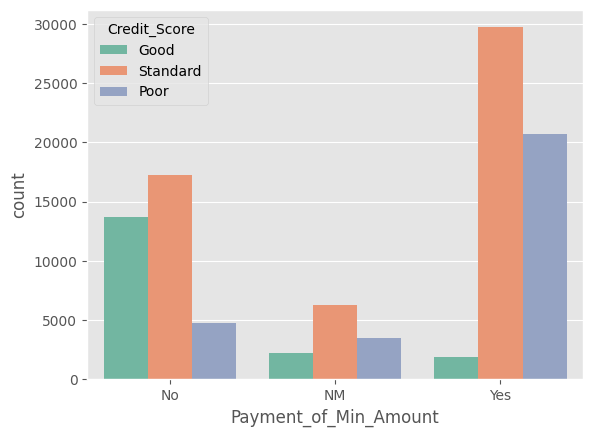

In [23]:
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.show()

##MULTIVARIATE ANALYSIS

##1️⃣7️⃣ Correlation Heatmap

**Pattren Observed:**
To detect strongest relationships among numeric variables.

**Insight:**
Strong correlation between debt, utilization, delays, and credit score drivers.

**Business Impact:**
Helps identify key variables for predictive modeling.

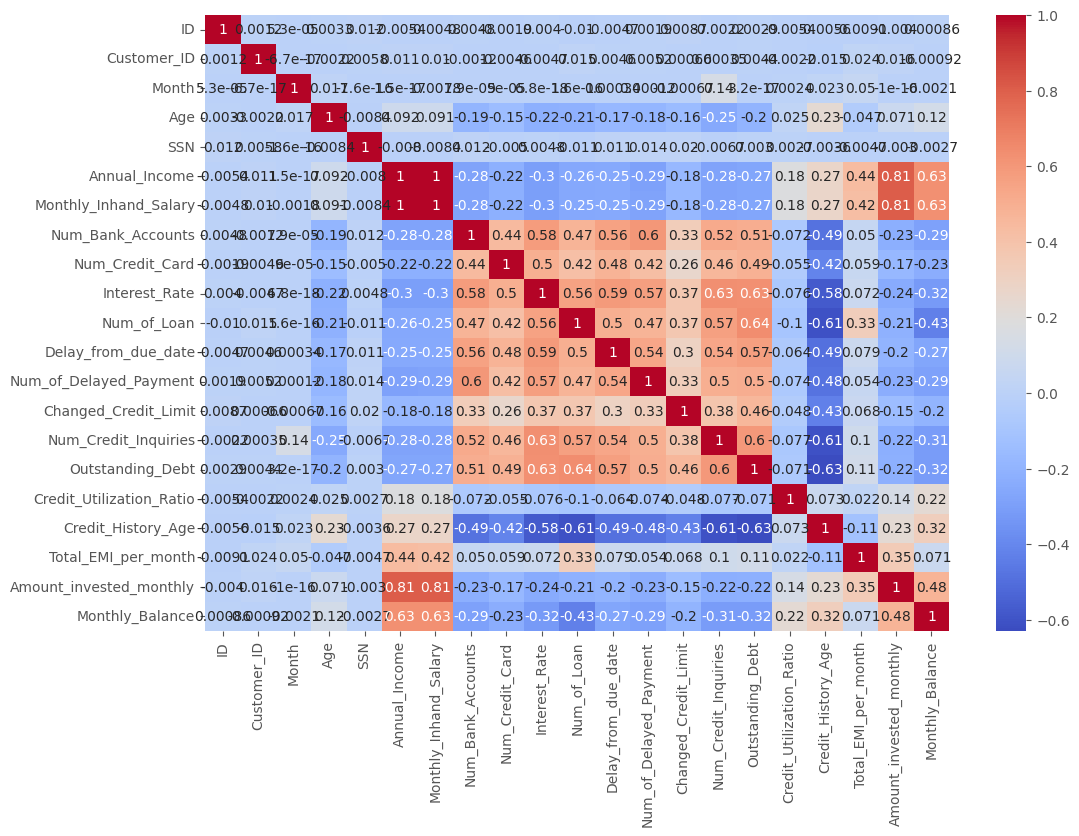

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##1️⃣8️⃣ Income vs EMI vs Credit Score

**Pattren Observed:**
Shows financial burden relative to earning capacity.

**Insight:**
Low income + high EMI cluster likely Poor category.

**Business Impact:**
Introduce EMI-to-income ratio threshold policy.

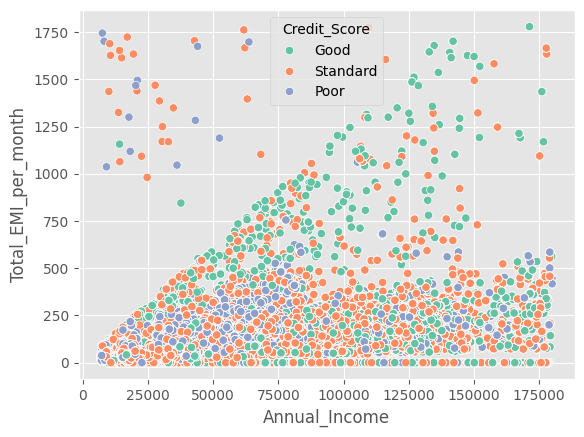

In [25]:
sns.scatterplot(
    x='Annual_Income',
    y='Total_EMI_per_month',
    hue='Credit_Score',
    data=df
)
plt.show()

##1️⃣9️⃣ Debt vs Utilization vs Credit Score

**Pattren Observed**
Combines two risk variables.

**Insight:**
High debt + high utilization strongly linked to Poor score.

**Business Impact:**
Identify high-risk cluster for early intervention.

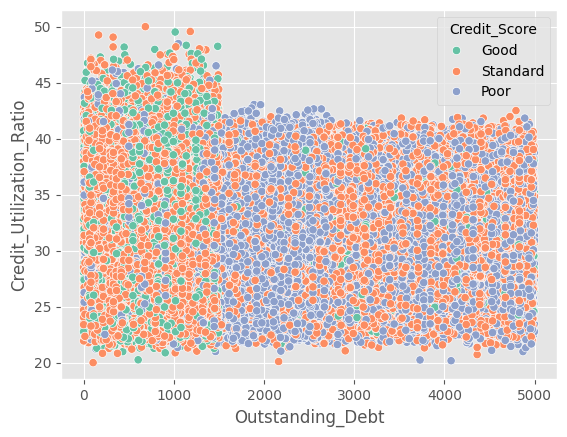

In [26]:
sns.scatterplot(
    x='Outstanding_Debt',
    y='Credit_Utilization_Ratio',
    hue='Credit_Score',
    data=df
)
plt.show()

##2️⃣0️⃣ Loans vs Inquiries vs Credit Score

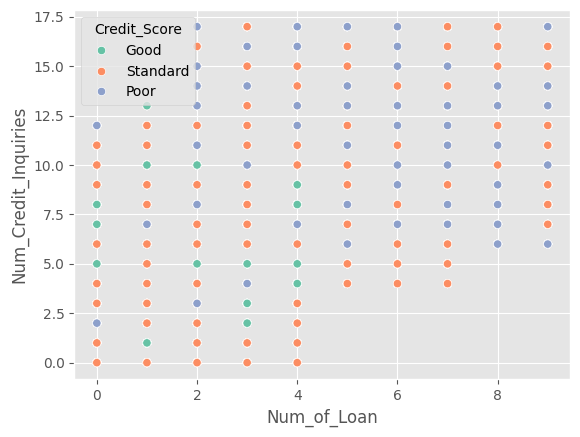

In [27]:
sns.scatterplot(
    x='Num_of_Loan',
    y='Num_Credit_Inquiries',
    hue='Credit_Score',
    data=df
)
plt.show()

#Conclusion

The analysis shows that customers with higher outstanding debt, higher credit utilization ratio, more delayed payments, and higher number of credit inquiries tend to fall into the Poor credit score category.

Income level, timely payments, and balanced credit mix significantly influence Good credit score classification.

Business Recommendations:
- Implement stricter monitoring for customers with high utilization ratio.
- Penalize repeated delayed payments.
- Use debt-to-income ratio as a key credit approval metric.
- Develop ML model for automated credit score prediction.